---
title: "Correlation of Enformer CAGE predictions and observed expression across all rn7 genes"
author: "Sabrina Mi"
description: "We calculate correlation for two comparisons: (1) Enformer predictions on rn7 reference genome against average gene expression in the Brain study and (2) Enformer predictions for a small sample of rats against their individual gene expression."
date: "8/15/23"
---

Our goal is to test whether Enformer can determine relative gene expression levels in rat Brain tissues. We used mean gene expression in Br rats as the ground truth, and predicted the CAGE Brain track at each gene's TSS. We found a correlation of 0.45 between reference genome CAGE predictions for humans and observed mean gene expression, compared to a correlation of 0.63 in our baseline comparison of CAGE predictions against mean gene expression in GTEx Brain cortex tissues.

## Reference Genome

### Read in expression files

In [1]:
import os
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tpm = pd.read_csv("/home/s1mi/enformer_rat_data/expression_data/Brain.rn7.expr.tpm.bed", sep="\t", header=0, index_col='gene_id')
tpm.head()

### Calculate average gene expression

In [8]:
mean_tpm = tpm.iloc[:,3:].mean(axis=1)
print(mean_tpm)

gene_id
ENSRNOG00000065394    0.000000
ENSRNOG00000065356    0.000000
ENSRNOG00000070568    0.000912
ENSRNOG00000065706    0.005029
ENSRNOG00000069644    0.000265
                        ...   
ENSRNOG00000067420    0.000000
ENSRNOG00000069298    0.000559
ENSRNOG00000066131    0.000529
ENSRNOG00000068239    0.000500
ENSRNOG00000069552    0.001088
Length: 30231, dtype: float64


In [9]:
mean_iqn = iqn.iloc[:,3:].mean(axis=1)
print(mean_iqn)

gene_id
ENSRNOG00000065394    0.000000
ENSRNOG00000065356    0.000000
ENSRNOG00000070568    0.052617
ENSRNOG00000065706    0.022574
ENSRNOG00000069644    0.011569
                        ...   
ENSRNOG00000067420    0.000000
ENSRNOG00000069298    0.004439
ENSRNOG00000066131    0.008208
ENSRNOG00000068239    0.004439
ENSRNOG00000069552    0.017464
Length: 30231, dtype: float64


In [30]:
## Put both means into dataframe
corr_df = pd.DataFrame({'tpm': mean_tpm, 'iqn': mean_iqn, 'predicted': np.full(30231, np.nan), 'chr': np.full(30231, np.nan)})
corr_df.head()

,tpm,iqn,predicted,chr
gene_id,,,,
ENSRNOG00000065394,0.000000,0.000000,NaN,NaN
ENSRNOG00000065356,0.000000,0.000000,NaN,NaN
ENSRNOG00000070568,0.000912,0.052617,NaN,NaN
ENSRNOG00000065706,0.005029,0.022574,NaN,NaN
ENSRNOG00000069644,0.000265,0.011569,NaN,NaN


### Calculate gene expression from Enformer predictions on reference genome

In [11]:
reference_predictions="/home/s1mi/Br_predictions/predictions_folder/reference_Br_all_genes/predictions_2023-08-11/enformer_predictions/reference_Br/haplotype0"

annot_df = pd.read_csv('/home/s1mi/enformer_rat_data/annotation/rn7.gene.txt', sep ='\t',  index_col='geneId')
annot_df.head(3)

/tmp/ipykernel_36254/3273646084.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  annot_df = pd.read_csv('/home/s1mi/enformer_rat_data/annotation/rn7.gene.txt', sep ='\t',  index_col='geneId')


,geneSymbol,chromosome,start,end,strand,tss,description,hasEqtl,expr_BLA,expr_Brain,...,sqtl_BLA,sqtl_Brain,sqtl_Eye,sqtl_IL,sqtl_LHb,sqtl_NAcc,sqtl_NAcc2,sqtl_OFC,sqtl_PL,sqtl_PL2
geneId,,,,,,,,,,,,,,,,,,,,,
ENSRNOG00000066169,ENSRNOG00000066169,1,36112690,36122387,-,36122387,NaN,True,True,True,...,False,False,False,False,False,False,False,False,False,False
ENSRNOG00000070168,Olr56,1,157231467,157232417,+,157231467,olfactory receptor family 51 subfamily F membe...,True,False,True,...,False,False,False,False,False,False,False,False,False,False
ENSRNOG00000070901,Irgq,1,80123925,80131881,+,80123925,immunity-related GTPase Q,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [3]:
# for gene in corr_df.index:
#     gene_annot = annot_df.loc[gene]
#     corr_df['chr'].loc[gene] = gene_annot['chromosome']
#     interval = f"chr{gene_annot['chromosome']}_{gene_annot['tss']}_{gene_annot['tss']}"
#     path = os.path.join(predictions_dir, f"{interval}_predictions.h5")
#     if os.path.isfile(path):
#         predictions = h5py.File(path, "r")
#         pred_expr = np.average(predictions[interval][446:450, 4980])
#         corr_df['predicted'].loc[gene] = pred_expr
#     else:
#         continue


# corr_df.dropna().to_csv("reference_epigenome_predicted_vs_observed.csv", index=True)

corr_df = pd.read_csv("reference_epigenome_predicted_vs_observed.csv", header = 0, index_col = 'gene_id')
print(corr_df)

                         tpm  predicted  chr
gene_id                                     
ENSRNOG00000065394  0.000000   0.002946  1.0
ENSRNOG00000065356  0.000000   0.004051  1.0
ENSRNOG00000070568  0.000912   0.003553  1.0
ENSRNOG00000065706  0.005029   0.005847  1.0
ENSRNOG00000069644  0.000265   0.001334  1.0
...                      ...        ...  ...
ENSRNOG00000067420  0.000000   0.001928    Y
ENSRNOG00000069298  0.000559   0.003280    Y
ENSRNOG00000066131  0.000529   0.003569    Y
ENSRNOG00000068239  0.000500   0.001887    Y
ENSRNOG00000069552  0.001088   0.001822    Y

[19493 rows x 3 columns]


I ran Enformer on roughly ~30,000 intervals, but it looks like we only have predictions for 2/3 of them. I'll investigate in another post.

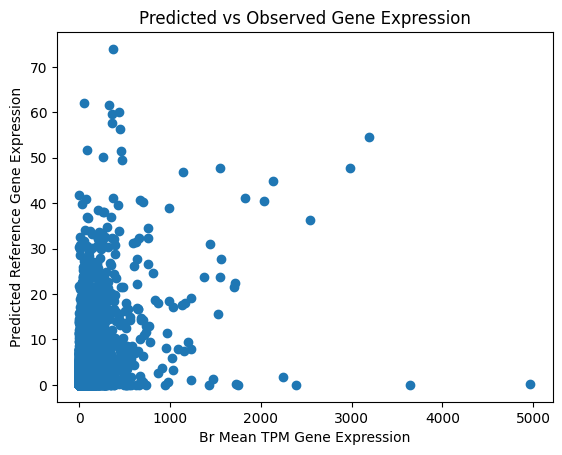

In [4]:
# Drop rows with NaN values
corr_df = corr_df.dropna()

# Create a scatter plot with colors based on column z
plt.scatter(corr_df['tpm'], corr_df['predicted'])

# Set labels and title
plt.xlabel('Br Mean TPM Gene Expression')
plt.ylabel('Predicted Rat Reference Gene Expression')
plt.title('Predicted vs Observed Gene Expression')

# Show the plot
plt.show()


In [7]:
corr_df[['tpm', 'predicted']].corr()

,tpm,predicted
tpm,1.000000,0.433632
predicted,0.433632,1.000000


The correlation between CAGE predictions and gene expression measured by relative abundance of transcripts is lower than we wanted. We'll compare it with average gene expression in human brain tissue. 

In [ ]:
gtex_tpm = pd.read_csv("gene_tpm_2017-06-05_v8_brain_cortex.gct.gz", header=2, sep="\t")
gtex_tpm.head()

In [15]:
# strip off ensembl version tag
gtex_tpm['Name'] = gtex_tpm['Name'].apply(lambda gene: gene.split('.')[0])
gtex_tpm.head()

,id,Name,Description,GTEX-1117F-3226-SM-5N9CT,GTEX-111FC-3126-SM-5GZZ2,GTEX-1128S-2726-SM-5H12C,GTEX-117XS-3026-SM-5N9CA,GTEX-1192X-3126-SM-5N9BY,GTEX-11DXW-1126-SM-5H12Q,GTEX-11DXY-3226-SM-5GIDE,...,GTEX-ZAK1-3026-SM-5S2MJ,GTEX-ZDXO-2126-SM-4WKFI,GTEX-ZE7O-3126-SM-5HL5X,GTEX-ZE9C-3026-SM-4WKHB,GTEX-ZF28-3026-SM-4WKHP,GTEX-ZUA1-3026-SM-59HJC,GTEX-ZVT3-3026-SM-5E43N,GTEX-ZYFD-3026-SM-5E44C,GTEX-ZYY3-3126-SM-5SI9L,GTEX-ZZPT-3026-SM-5GZXH
0,0,ENSG00000223972,DDX11L1,0.0178,0.0000,0.0171,0.0000,0.0260,0.0000,0.000,...,0.0000,0.0184,0.0000,0.0000,0.0000,0.000,0.0355,0.0000,0.0000,0.0187
1,1,ENSG00000227232,WASH7P,6.8920,4.2250,2.3590,3.6930,5.0400,2.2010,2.394,...,2.4190,3.0860,3.6510,1.9050,3.7270,2.542,1.8740,2.3140,4.3050,2.1230
2,2,ENSG00000278267,MIR6859-1,0.0000,0.4912,0.0000,0.0000,0.0000,0.0000,0.000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000
3,3,ENSG00000243485,MIR1302-2HG,0.0000,0.0771,0.0341,0.0308,0.0519,0.0000,0.000,...,0.1409,0.0367,0.0427,0.0551,0.0336,0.000,0.0000,0.0374,0.0468,0.0000
4,4,ENSG00000237613,FAM138A,0.0000,0.0000,0.0242,0.0219,0.0000,0.0231,0.000,...,0.0000,0.0261,0.0304,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000


In [19]:
# human to rat gene dictionary
ortho_genes = pd.read_csv("ortholog_genes_rats_humans.tsv", header=0, sep="\t", usecols=['ensembl_gene_id', 'rnorvegicus_homolog_ensembl_gene'])
ortho_genes.head()

,ensembl_gene_id,rnorvegicus_homolog_ensembl_gene
0,ENSG00000198888,ENSRNOG00000030644
1,ENSG00000198763,ENSRNOG00000031033
2,ENSG00000198804,ENSRNOG00000034234
3,ENSG00000198712,ENSRNOG00000030371
4,ENSG00000228253,ENSRNOG00000033299


In [23]:
# use this map to swap human gene names with rat orthologs
merged_df = gtex_tpm.merge(ortho_genes, left_on='Name', right_on='ensembl_gene_id', how='inner')
merged_df.head()


,id,Name,Description,GTEX-1117F-3226-SM-5N9CT,GTEX-111FC-3126-SM-5GZZ2,GTEX-1128S-2726-SM-5H12C,GTEX-117XS-3026-SM-5N9CA,GTEX-1192X-3126-SM-5N9BY,GTEX-11DXW-1126-SM-5H12Q,GTEX-11DXY-3226-SM-5GIDE,...,GTEX-ZE7O-3126-SM-5HL5X,GTEX-ZE9C-3026-SM-4WKHB,GTEX-ZF28-3026-SM-4WKHP,GTEX-ZUA1-3026-SM-59HJC,GTEX-ZVT3-3026-SM-5E43N,GTEX-ZYFD-3026-SM-5E44C,GTEX-ZYY3-3126-SM-5SI9L,GTEX-ZZPT-3026-SM-5GZXH,ensembl_gene_id,rnorvegicus_homolog_ensembl_gene
0,7,ENSG00000186092,OR4F5,0.1004,0.0364,0.0322,0.0581,0.0489,0.0919,0.045,...,0.0,0.052,0.0634,0.1199,0.2343,0.0705,0.0,0.0,ENSG00000186092,ENSRNOG00000047700
1,7,ENSG00000186092,OR4F5,0.1004,0.0364,0.0322,0.0581,0.0489,0.0919,0.045,...,0.0,0.052,0.0634,0.1199,0.2343,0.0705,0.0,0.0,ENSG00000186092,ENSRNOG00000046942
2,7,ENSG00000186092,OR4F5,0.1004,0.0364,0.0322,0.0581,0.0489,0.0919,0.045,...,0.0,0.052,0.0634,0.1199,0.2343,0.0705,0.0,0.0,ENSG00000186092,ENSRNOG00000055449
3,7,ENSG00000186092,OR4F5,0.1004,0.0364,0.0322,0.0581,0.0489,0.0919,0.045,...,0.0,0.052,0.0634,0.1199,0.2343,0.0705,0.0,0.0,ENSG00000186092,ENSRNOG00000042991
4,14,ENSG00000222623,RNU6-1100P,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,...,0.0,0.000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,ENSG00000222623,ENSRNOG00000055395


In [42]:
gtex_mean_tpm = merged_df.iloc[:,3:-2].mean(axis=1)
gtex_mean_tpm.index = merged_df['rnorvegicus_homolog_ensembl_gene']
gtex_mean_tpm.name = 'gtex'
print(gtex_mean_tpm)

rnorvegicus_homolog_ensembl_gene
ENSRNOG00000047700        0.143794
ENSRNOG00000046942        0.143794
ENSRNOG00000055449        0.143794
ENSRNOG00000042991        0.143794
ENSRNOG00000055395        0.001240
                          ...     
ENSRNOG00000031053    26848.819608
ENSRNOG00000029707    54407.450980
ENSRNOG00000029971    10158.058824
ENSRNOG00000029042     9048.839216
ENSRNOG00000031766    31076.035294
Name: gtex, Length: 22411, dtype: float64


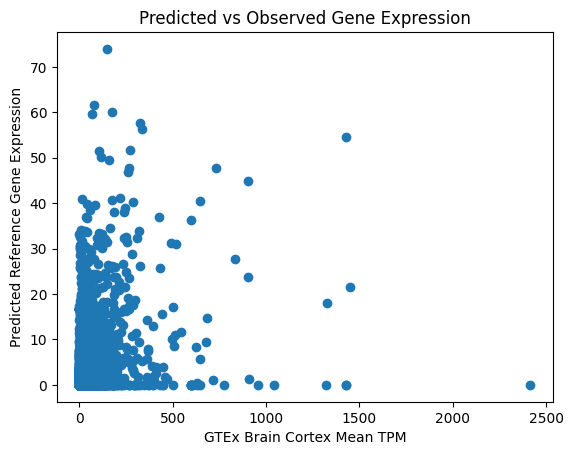

In [52]:
# Create a scatter plot with colors based on column z
plt.scatter(corr_df['gtex'], corr_df['predicted'])

# Set labels and title
plt.xlabel('GTEx Brain Cortex Mean TPM')
plt.ylabel('Predicted Rat Reference Gene Expression')
plt.title('Predicted vs Observed Gene Expression')

# Show the plot
plt.show()

In [51]:
#corr_df.join(gtex_mean_tpm).dropna()
corr_df[['tpm','predicted','gtex']].corr()

,tpm,predicted,gtex
tpm,1.000000,0.456471,0.629975
predicted,0.456471,1.000000,0.306466
gtex,0.629975,0.306466,1.000000


Lastly, we'll concatenate all the prediction matrices into one h5 file.

## Concatenate Predictions

In [20]:
def concatenate_predictions(predictions_dir, output_path):
    with h5py.File(output_path, "w") as output_file:
        files = os.listdir(predictions_dir)
        for file in files:
            interval = file.replace("_predictions.h5", "")
            with h5py.File(os.path.join(predictions_dir, file), "r") as input_file:
                output_file.create_dataset(interval, data=input_file[interval][()], shape=(896,5313))

In [21]:
concatenate_predictions(reference_predictions, "/home/s1mi/Br_predictions/2023-08-16_predictions_some_missing_genes.h5")